# 自动微分 

## 例子 

In [1]:
import torch
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [2]:
x.requires_grad_(True)
print(x.grad)

None


In [3]:
y = 2*torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

In [4]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [5]:
x.grad == 4 *x

tensor([True, True, True, True])

In [6]:
x.grad.zero_()
y=x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

## 非标量变量的反向传播 

In [7]:
x.grad.zero_()
y = x*x
y.backward(torch.ones(len(x)))
x.grad

tensor([0., 2., 4., 6.])

## 分离计算

In [8]:
x.grad.zero_()
y= x*x
u = y.detach()
z = u*x
z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [9]:
x.grad.zero_()
y.sum().backward()
x.grad == 2*x

tensor([True, True, True, True])

## python控制流的梯度计算 

In [10]:
def f(a):
    b = a *2
    while b.norm() < 1000:
        b = b *2
    if b.sum() >0:
        c = b
    else:
        c = 100 *b
    return c

In [11]:
a = torch.randn(size=(),requires_grad = True)
a

tensor(-0.3091, requires_grad=True)

In [12]:
d = f(a)
d.backward()

In [13]:
a.grad==d /a

tensor(True)

## 练习 

In [14]:
x = torch.arange(-10,10,0.1)

In [15]:
x.requires_grad_(True)

tensor([-1.0000e+01, -9.9000e+00, -9.8000e+00, -9.7000e+00, -9.6000e+00,
        -9.5000e+00, -9.4000e+00, -9.3000e+00, -9.2000e+00, -9.1000e+00,
        -9.0000e+00, -8.9000e+00, -8.8000e+00, -8.7000e+00, -8.6000e+00,
        -8.5000e+00, -8.4000e+00, -8.3000e+00, -8.2000e+00, -8.1000e+00,
        -8.0000e+00, -7.9000e+00, -7.8000e+00, -7.7000e+00, -7.6000e+00,
        -7.5000e+00, -7.4000e+00, -7.3000e+00, -7.2000e+00, -7.1000e+00,
        -7.0000e+00, -6.9000e+00, -6.8000e+00, -6.7000e+00, -6.6000e+00,
        -6.5000e+00, -6.4000e+00, -6.3000e+00, -6.2000e+00, -6.1000e+00,
        -6.0000e+00, -5.9000e+00, -5.8000e+00, -5.7000e+00, -5.6000e+00,
        -5.5000e+00, -5.4000e+00, -5.3000e+00, -5.2000e+00, -5.1000e+00,
        -5.0000e+00, -4.9000e+00, -4.8000e+00, -4.7000e+00, -4.6000e+00,
        -4.5000e+00, -4.4000e+00, -4.3000e+00, -4.2000e+00, -4.1000e+00,
        -4.0000e+00, -3.9000e+00, -3.8000e+00, -3.7000e+00, -3.6000e+00,
        -3.5000e+00, -3.4000e+00, -3.3000e+00, -3.2

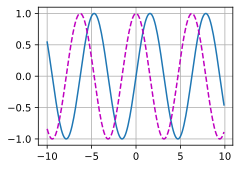

In [16]:
from d2l import torch as d2l

y=x.sin()
y2=y.detach()
y.sum().backward()
d = x.grad
x1=x.detach()

d2l.plot(x1,[y2,d])